In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


Coeficientes: [  0.49300675 289.32526239]
Error cuadrático medio: 1655034368.49
Puntaje de varianza (R^2 score): 0.12


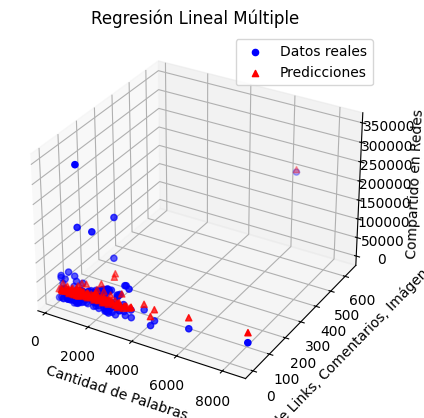

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("articulos_ml.csv")

# Crear una nueva variable combinando enlaces, comentarios e imágenes
suma = (df["# of Links"] + df['# of comments'].fillna(0) + df['# Images video'])

# Crear la matriz de características
dataX2 = pd.DataFrame()
dataX2["Word count"] = df["Word count"]
dataX2["suma"] = suma

# Convertir los datos a arrays de NumPy
XY_train = np.array(dataX2)
z_train = df['# Shares'].values

# Crear el modelo de regresión lineal múltiple
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

# Hacer predicciones
z_pred = regr2.predict(XY_train)

# Evaluación del modelo
print('Coeficientes:', regr2.coef_)
print("Error cuadrático medio: %.2f" % mean_squared_error(z_train, z_pred))
print('Puntaje de varianza (R^2 score): %.2f' % r2_score(z_train, z_pred))

# Graficar en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', marker='o', label="Datos reales")
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', marker='^', label="Predicciones")
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Suma de Links, Comentarios, Imágenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal Múltiple')
plt.legend()
plt.show()
